<h2>Project 7: CART</h2>


<!--announcements-->
<blockquote>
    <center>
    <img src="forest.jpg" width="400px" />
    </center>
      <p><cite><center>Boosting took a long time to be truly understood.<br>
      ... cynics say we didn't see the forest for all the trees ...<br>
      </center></cite></p>
</blockquote>

<!--announcements-->






<h3>Introduction</h3>
<p>In this assignment you will implement a decision tree algorithm and then use it for bagging and boosting. We've provided a tree structure for you with distinct leaves and nodes. Leaves have two fields, parent (another node) and prediction (a numerical value). Nodes have six fields: 

<ol>
<li> <b>left</b>: node describing left subtree </li>
<li> <b>right</b>: node describing right subtree </li>
<li> <b>parent</b>: the parent of the current subtree. The head of the tree always has <code><b>None</b></code> as its parent. Feel free to initialize nodes with this field set to <code><b>None</b></code> so long as you set the correct parent later on. </li>
<li> <b>cutoff_id</b>: index of feature to cut </li>
<li> <b>cutoff_val</b>: cutoff value c (<=c : left, and >c : right)</li>
<li> <b>prediction</b>: prediction at this node </li>
</ol>
</p>


        

In [1]:
#<GRADED>
class TreeNode(object):
    """Tree class.
    
    (You don't need to add any methods or fields here but feel
    free to if you like. Our tests will only reference the fields
    defined in the constructor below, so be sure to set these
    correctly.)
    """
    
    def __init__(self, left, right, parent, cutoff_id, cutoff_val, prediction):
        self.left = left
        self.right = right
        self.parent = parent
        self.cutoff_id = cutoff_id
        self.cutoff_val = cutoff_val
        self.prediction = prediction
#</GRADED>

<h3>Implementing CART</h3>
Before we get started let us add a few packages that you might need. We will also load a data set <a href="https://archive.ics.uci.edu/ml/datasets/Ionosphere">ION</a>, which we will use as our binary test classification problem.

In [2]:
%matplotlib inline

#<GRADED>
import numpy as np
from numpy.matlib import repmat
import sys
import time
#</GRADED>
import matplotlib.pyplot as plt
from scipy.io import loadmat

# load in some binary test data (labels are -1, +1)
data = loadmat("ion.mat")
xTr  = data['xTr'].T
yTr  = data['yTr'].flatten()
xTe  = data['xTe'].T
yTe  = data['yTe'].flatten()

# cut off the first two dimensions for visualization
xTr2d = xTr[:, 0:2]
xTe2d = xTe[:, 0:2]

xTr.shape, yTr.shape, xTe.shape, yTe.shape

((281, 34), (281,), (70, 34), (70,))

<p>First, implement the function <code>sqsplit</code> which takes as input a (weighted) data set with labels and computes the best feature and cut-value of an optimal split based on minimum squared error. The third input is a weight vector which assigns a positive weight to each training sample. The loss you should minimize is
$$
loss(L,R)=\sum_{i\in L}w_i\left(y_i-\frac{1}{w_{L}}\mu_L\right)^2+\sum_{j\in R}w_j\left(y_j-\frac{1}{w_{R}}\mu_R\right)^2
$$
where
$$w_L=\sum_{i\in L}w_i \textrm{ and } \mu_L=\sum_{i\in L}w_i y_i$$ 
and respectively for $w_R$ and $\mu_R$. <br>
Use your derivation from Homework 5, Problem 2 to implement this function efficiently.</p>



In [3]:
#<GRADED>
def sqsplit(xTr,yTr,weights=[]):
    """Finds the best feature, cut value, and loss value.
    
    Input:
        xTr:     n x d matrix of data points
        yTr:     n-dimensional vector of labels
        weights: n-dimensional weight vector for data points
    
    Output:
        feature:  index of the best cut's feature
        cut:      cut-value of the best cut
        bestloss: loss of the best cut
    """
    N,D = xTr.shape
    assert D > 0 # must have at least one dimension
    assert N > 1 # must have at least two samples
    if weights == []: # if no weights are passed on, assign uniform weights
        weights = np.ones(N)
    weights = weights/float(sum(weights)) # Weights need to sum to one (we just normalize them)
    
    bestloss = np.inf
    feature = np.inf
    cut = np.inf
    
    #todo
   
    sum_w = np.sum(weights)
   
    #if(N==2):
        #print(xTr[0])
        #print(xTr[1])
        
    for f in range(0, D):
        
        #sort on basis of f column..xnew contains sorted data on feature f
        xnew= xTr[xTr[:,f].argsort()]
        #sort the weights according to feature f
        wnew=weights[xTr[:,f].argsort()]
        ynew = yTr[xTr[:,f].argsort()]
        
        wl = wnew[0]
        yl = ynew[0]
        
        
        tl = np.inner(wl, yl) / float(np.sum(wl))
        
        
    
        wrr = np.delete(wnew, 0, 0)
        #print("wrr=", np.sum(wrr))
#         wr = sum_w - wl
#         print("sum old=", wr)
        yrr = np.delete(ynew, 0, 0)
        tr = np.inner(wrr, yrr) / float(np.sum(wrr))
        
        #print("tl=", tl)
        #print("tr=", tr)
        prev=0
        for cind in range(0,N-1):
            #cutvalue = cut after xnew[cind] <=cval on left and >cval on right 
            
            cval = xnew[cind][f]
            
            yupd = yl - tl
            yupd_sq = np.square(yupd)
            val1 = np.inner(wl, yupd_sq)
            
            yupd_r = yrr - tr
                #val3 = wl * yupd *yupd
            yupd_r_sq = np.square(yupd_r)
            val2 = np.inner(wrr, yupd_r_sq)
            loss = val1+val2
            #val4 = wrr* yupd_r *yupd_r
            #print("loss=", loss)
            if((cval != xnew[cind+1][f]) and loss<=bestloss):
                #print("Updating loss")
                bestloss = loss
                cut = cval
                feature = f
                
            if(cind!= N-2):
                yl = np.append(yl, yrr[0])
                yrr = np.delete(yrr, 0, 0)
            
                wl = np.append(wl, wrr[0])
                wrr = np.delete(wrr, 0, 0)
                tl = np.inner(wl, yl) / float(np.sum(wl))
                tr = np.inner(wrr, yrr) / float(np.sum(wrr))
            #prev=cval
            
            #cval=(xnew[cind][f]+xnew[cind+1][f])/2
            
            
    #todo over
    
    
    return feature, cut, bestloss
#</GRADED>

In [4]:
t0 = time.time()
fid,cut,loss = sqsplit(xTr,yTr)
t1 = time.time()
print('elapsed time:',t1-t0,'seconds')
print("It should split on feature 2 on value 0.29920161791103117")
print("Split on feature",fid,"on value:",cut)

elapsed time: 0.6182084083557129 seconds
It should split on feature 2 on value 0.29920161791103117
Split on feature 2 on value: 0.299201617911


<b>Cart tree:</b><p>Implement the function <code>cart</code> which returns a regression tree based on the minimum squared loss splitting rule. The function takes training data, test data, a maximum depth, and the weigh of each training example. Maximum depth and weight are optional arguments. If they are not provided you should make maximum depth infinity and equally weight each example. You should use the function <code>sqsplit</code> to make your splits.</p>

<p>Use the provided <code>TreeNode</code> class to represent your tree. Note that the nature of CART trees implies that every node has exactly 0 or 2 children.</p>


In [5]:
#<GRADED>
# from collections import Counter
# def max_freq(a):

#     b = Counter(a)
#     return b.most_common(1)

def cart(xTr,yTr,depth=np.inf,weights=None):
    """Builds a CART tree.
    
    The maximum tree depth is defined by "maxdepth" (maxdepth=2 means one split).
    Each example can be weighted with "weights".

    Args:
        xTr:      n x d matrix of data
        yTr:      n-dimensional vector
        maxdepth: maximum tree depth
        weights:  n-dimensional weight vector for data points

    Returns:
        tree: root of decision tree
    """
    n,d = xTr.shape
    if weights is None:
        w = np.ones(n) / float(n)
    else:
        w = weights
        
    tree = None
    
    #todo
                
    if(depth==1 or n==1):
        tree = TreeNode(None, None, None, None, None, np.mean(yTr))
    else:    
        #print(xTr.shape,yTr.shape)
        feature, cut, bestloss=sqsplit(xTr,yTr,w)
        #print(feature,cut,bestloss)
        if(feature == np.inf):
            feature=d-1
            cut=xTr[n-1][d-1]
        l = []
        r = []
        l_y =[]
        r_y = []
        l_w = []
        r_w = []
    
        #run through all the point
        for j in range(0,n):
            #print("Feature")
            #print(feature)
            if(xTr[j][feature]<=cut):
                l.append(xTr[j])
                l_y.append(yTr[j])
                l_w.append(w[j])
            else:
                r.append(xTr[j])
                r_y.append(yTr[j])
                r_w.append(w[j])
            
        if(len(l)==0 or len(r)==0):
            #pure left leaf
            #def __init__(self, left, right, parent, cutoff_id, cutoff_val, prediction)
#             lft = cart(xTr,yTr,depth=np.inf,weights=None)
#             rght = cart(xTr,yTr,depth,weights=None)
            #tree = TreeNode()
            tree = TreeNode(None, None, None, None, None, np.sum(yTr)/n)
            #tree.prediction = np.sum(yTr)/n
        else:
            xl = np.array(l)
            yl = np.array(l_y)
            wl = np.array(l_w)
            
            xr = np.array(r)
            yr = np.array(r_y)
            wr = np.array(r_w)
            
            if(depth!=np.inf):
                lft =  cart(xl,yl,depth-1,wl)
                rgt = cart(xr, yr, depth-1, wr)
            else:
                lft =  cart(xl,yl,np.inf,wl)
                rgt = cart(xr, yr, np.inf, wr)
            tree = TreeNode(None, None, None, 0, 0, yTr)
            #tree = TreeNode()
            tree.left = lft
            tree.right = rgt
            tree.cutoff_id = feature
            tree.cutoff_val = cut
            tree.prediction = (lft.prediction + rgt.prediction)/2
            lft.parent = tree
            rgt.parent = tree
            
#         self.left = left
#         self.right = right
#         self.parent = parent
#         self.cutoff_id = cutoff_id
#         self.cutoff_val = cutoff_val
#         self.prediction = prediction
    
    return tree
    
    
#</GRADED>

<p>Implement the function <code>evaltree</code>, which evaluates a decision tree on a given test data set.</p>

In [6]:
#<GRADED>
def pernodeeval(root, pnt):
    if(root.left==None and root.right==None):
        return root.prediction
    else:
        if(pnt[root.cutoff_id]<=root.cutoff_val):
            return pernodeeval(root.left, pnt)
        else:
            return pernodeeval(root.right, pnt)
        
def evaltree(root,xTe):
    """Evaluates xTe using decision tree root.
    
    Input:
        root: TreeNode decision tree
        xTe:  n x d matrix of data points
    
    Output:
        pred: n-dimensional vector of predictions
    """
    assert root is not None
    
    #todo
    n,d = xTe.shape
    pred = np.zeros(n)
    for i in range(0, n):
        pred[i]=pernodeeval(root,xTe[i])
    
    return pred
#</GRADED>

In [7]:
t0 = time.time()
root = cart(xTr, yTr)
t1 = time.time()

tr_err   = np.mean((evaltree(root,xTr) - yTr)**2)
te_err   = np.mean((evaltree(root,xTe) - yTe)**2)

print("elapsed time: %.2f seconds" % (t1-t0))
print("Training RMSE : %.2f" % tr_err)
print("Testing  RMSE : %.2f" % te_err)

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


elapsed time: 8.44 seconds
Training RMSE : 0.00
Testing  RMSE : 0.97


<p>The following code defines a function <code>visclassifier()</code>, which plots the decision boundary of a classifier in 2 dimensions. Execute the following code to see what the decision boundary of your tree looks like on the ion data set. </p>

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


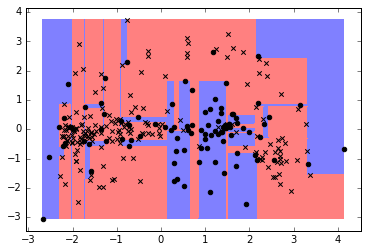

Training error: 0.0000
Testing error:  0.2000


In [8]:
def visclassifier(fun,xTr,yTr,w=[],b=0):
    """
    visualize decision boundary
    Define the symbols and colors we'll use in the plots later
    """

    yTr = np.array(yTr).flatten()
    w = np.array(w).flatten()

    symbols = ["ko","kx"]
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    classvals = np.unique(yTr)

    plt.figure()

    res=300
    xrange = np.linspace(min(xTr[:, 0]), max(xTr[:, 0]),res)
    yrange = np.linspace(min(xTr[:, 1]), max(xTr[:, 1]),res)
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T

    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T

    testpreds = fun(xTe)
    Z = testpreds.reshape(res, res)
    # Z[0,0] = 1 # optional: scale the colors correctly
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

    for idx, c in enumerate(classvals):
        plt.scatter(xTr[yTr == c,0],
            xTr[yTr == c,1],
            marker=marker_symbols[idx],
            color='k'
            )

    if w != []:
        alpha = -1 * b / (w ** 2).sum()
        plt.quiver(w[0] * alpha, w[1] * alpha,
            w[0], w[1], linewidth=2, color=[0,1,0])

    plt.axis('tight')
    plt.show()
    
tree=cart(xTr2d,yTr) # compute tree on training data 
visclassifier(lambda X:evaltree(tree,X),xTr2d,yTr)
print("Training error: %.4f" % np.mean(np.sign(evaltree(tree,xTr2d)) != yTr))
print("Testing error:  %.4f" % np.mean(np.sign(evaltree(tree,xTe2d)) != yTe))

<h2>Random Forests</h2>
<p>CART trees are known to be high variance classifiers
(if trained to full depth).
An effective way to prevent overfitting is to use <b>Bagging</b>.
Implement the function <code>forest</code>,
which builds a forest of regression trees.
Each tree should be built using training data
drawn by randomly sampling $n$ examples
from the training data with replacement.
Do not randomly sample features.
The function should output a list of trees.</p>

In [9]:
#<GRADED>
def forest(xTr, yTr, m, maxdepth=np.inf):
    """Creates a random forest.
    
    Input:
        xTr:      n x d matrix of data points
        yTr:      n-dimensional vector of labels
        m:        number of trees in the forest
        maxdepth: maximum depth of tree
        
    Output:
        trees: list of TreeNode decision trees of length m
    """
    
    n, d = xTr.shape
    trees = []
    
    #todo start here
    
    for i in range(0,m):
        rand=np.random.randint(n, size=n)
        xTrReplace=xTr[rand,:]
        yTrReplace=yTr[rand]
        #print(maxdepth)
        root=cart(xTrReplace,yTrReplace,depth=maxdepth)
        
        trees.append(root)

    
    return trees
#</GRADED>

<p>Now implement the function <code>evalforest</code>, which should take as input a set of $m$ trees, a set of $n$ test inputs, and an $m$ dimensional weight vector. Each tree should be weighted by the corresponding weight. (For random forests you can define the weights to be $\frac{1}{m}$ for all trees.</p>

In [10]:
#<GRADED>
def evalforest(trees, X, alphas=None):
    """Evaluates X using trees.
    
    Input:
        trees:  list of TreeNode decision trees of length m
        X:      n x d matrix of data points
        alphas: m-dimensional weight vector
        
    Output:
        pred: n-dimensional vector of predictions
    """
    m = len(trees)
    n,d = X.shape
    if alphas is None:
        alphas = np.ones(m) / len(trees)
            
    pred = np.zeros(n)
    numTrees=len(trees)
    for i in range(0,numTrees):
    #     add weights to each weight and take avg??
        pred=pred+(alphas[i]*evaltree(trees[i],X))
        
    
    
    
    return pred
#</GRADED>

<p>The following script visualizes the decision boundary of a random forest ensemble.</p>

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


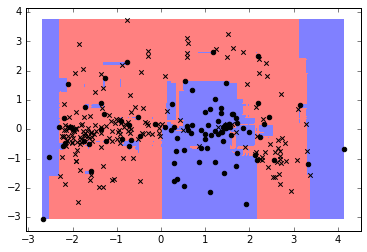

Training error: 0.0000
Testing error:  0.1143


In [11]:
trees=forest(xTr2d,yTr,100) # compute tree on training data 
visclassifier(lambda X:evalforest(trees,X),xTr2d,yTr)

print("Training error: %.4f" % np.mean(np.sign(evalforest(trees,xTr2d)) != yTr))
print("Testing error:  %.4f" % np.mean(np.sign(evalforest(trees,xTe2d)) != yTe))

<p>The following script evaluates the test and training error of a random forest ensemble as we vary the number of trees.</p>

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


[0]training err = 0.0463	testing err = 0.1143


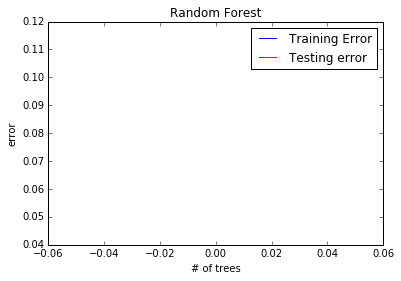

In [12]:
M=1 # max number of trees
err_trB=[]
err_teB=[]
for i in range(M):
    trees=forest(xTr,yTr,i+1)
    trErr = np.mean(np.sign(evalforest(trees,xTr)) != yTr)
    teErr = np.mean(np.sign(evalforest(trees,xTe)) != yTe)
    err_trB.append(trErr)
    err_teB.append(teErr)
    print("[%d]training err = %.4f\ttesting err = %.4f" % (i,trErr, teErr))

plt.figure()
line_tr, = plt.plot(range(M),err_trB,label="Training Error")
line_te, = plt.plot(range(M),err_teB,label="Testing error")
plt.title("Random Forest")
plt.legend(handles=[line_tr, line_te])
plt.xlabel("# of trees")
plt.ylabel("error")
plt.show()

<h2>Boosting</h2>

<p>Another option to improve your decision trees is to build trees of small depth (e.g. only depth=3 or depth=4). These do not have high variance, but instead suffer from <b>high bias</b>. You can reduce the bias of a classifier with boosting. Implement the function <code>boosttree</code>, which applies Adaboost on your <code>cart</code> functions. You should be able to use the function <code>evalforest</code> to evaluate your boosted ensemble (provdided you pass on the weights correctly.)</p>

In [21]:
#<GRADED>
def boosttree(x,y,maxiter=100,maxdepth=2):
    """Learns a boosted decision tree.
    
    Input:
        x:        n x d matrix of data points
        y:        n-dimensional vector of labels
        maxiter:  maximum number of trees
        maxdepth: maximum depth of a tree
        
    Output:
        forest: list of TreeNode decision trees of length m
        alphas: m-dimensional weight vector
        
    (note, m is at most maxiter, but may be smaller,
    as dictated by the Adaboost algorithm)
    """
    assert np.allclose(np.unique(y), np.array([-1,1])); # the labels must be -1 and 1 
    n,d = x.shape
    weights = np.ones(n) / n
    preds   = None
    forest  = []
    alphas  = []
    
    #start here
    #trees=forest(x,y,maxiter,maxdepth)
    
    
    for t in range(maxiter):
        tree=cart(x,y,depth=maxdepth, weights=weights)
        #epsilon=(np.dot(weights,np.sign(evaltree(tree,x)) != y))/(np.sum(weights))
        pred=np.sign(evaltree(tree,x))
        epsilon=np.sum(weights[pred!=y])
        #epsilon=np.mean(np.sign(evaltree(tree,x)) != y)
        print(epsilon)
        if epsilon > 0.5 :
            epsilon = 1-epsilon
        if epsilon < 0.5 : ##?? something fishy??
            alp= 0.5 * (np.log((1-epsilon)/epsilon))
            alphas.append(alp)
            forest.append(tree)
            weights=np.multiply(weights,np.exp(-alp * np.multiply(pred,y)))/(2*np.sqrt(epsilon * (1-epsilon)))
            weights=weights/(np.sum(weights))
            print(weights[0])
        else:
            break
            
    
    return forest, alphas
#</GRADED>

<p>The following script evaluates the test and training error of a boosted forest as we increase the number of trees.</p>

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


0.113879003559
0.0135183106883
[0]training err = 0.1139	testing err = 0.2000
0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
[1]training err = 0.0996	testing err = 0.1714
0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
0.214323239874
0.00666327981223
[2]training err = 0.0854	testing err = 0.2000
0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
0.214323239874
0.00666327981223
0.177997755061
0.00530936313908
[3]training err = 0.0463	testing err = 0.1571
0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
0.214323239874
0.00666327981223
0.177997755061
0.00530936313908
0.174679066479
0.0138083902971
[4]training err = 0.0427	testing err = 0.1571
0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
0.214323239874
0.00666327981223
0.177997755061
0.00530936313908
0.174679066479
0.0138083902971
0.179397067106
0.013233367703
[5]training err = 0.0356	testing err = 0.1571
0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
0.214

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in sqrt


0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
0.214323239874
0.00666327981223
0.177997755061
0.00530936313908
0.174679066479
0.0138083902971
0.179397067106
0.013233367703
0.240511453508
0.0150908754116
0.394218146061
0.0157448633415
0.227747036005
0.0288678321825
0.519191874389
0.0293034211903
0.52863681334
0.0299822835255
0.546064571584
0.0311597141781
0.556686459938
0.0327143256965
0.623377564576
0.0278922451619
0.288409421633
0.023750595947
0.757181852523
0.0315051346133
1.00055768164
nan
nan
[17]training err = 1.0000	testing err = 1.0000
0.113879003559
0.0135183106883
0.157010514862
0.0089363499664
0.214323239874
0.00666327981223
0.177997755061
0.00530936313908
0.174679066479
0.0138083902971
0.179397067106
0.013233367703
0.240511453508
0.0150908754116
0.394218146061
0.0157448633415
0.227747036005
0.0288678321825
0.519191874389
0.0293034211903
0.52863681334
0.0299822835255
0.546064571584
0.0311597141781
0.556686459938
0.0327143256965
0.623377564576
0.0278922451619
0.

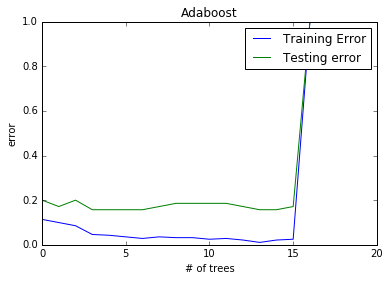

In [22]:
M=20 # max number of trees
err_trB=[]
err_teB=[]
for i in range(M):
    forest,alphas=boosttree(xTr,yTr,maxdepth=3,maxiter=i+1)
    trErr = np.mean(np.sign(evalforest(forest,xTr,alphas)) != yTr)
    teErr = np.mean(np.sign(evalforest(forest,xTe,alphas)) != yTe)
    err_trB.append(trErr)
    err_teB.append(teErr)
    print("[%d]training err = %.4f\ttesting err = %.4f" % (i,trErr, teErr))

plt.figure()
line_tr, = plt.plot(range(M),err_trB,label="Training Error")
line_te, = plt.plot(range(M),err_teB,label="Testing error")
plt.title("Adaboost")
plt.legend(handles=[line_tr, line_te])
plt.xlabel("# of trees")
plt.ylabel("error")
plt.show()